<a href="https://colab.research.google.com/github/muhammadfawad538/AI-ML-Unsupervised/blob/main/Untitled22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Kmean Algorithm


In [1]:
# Install required libraries (if running in Colab)
!pip install -q scikit-learn matplotlib seaborn


In [2]:

# Import libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay


In [3]:
# Load Iris dataset
data = load_iris()
data

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [5]:
def euclidean(a, b):
    return np.sqrt(np.sum((a - b) ** 2))


In [6]:

X = data.data
y = data.target
target_names = data.target_names

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
# Before Applying PCA (Without PCA)
print("Original number of features:", X_train.shape[1])


In [7]:
def kmeans_manual(X, k, max_iters=100):
    np.random.seed(42)
    # Step 1: Initialize centroids randomly
    centroids = X[np.random.choice(X.shape[0], k, replace=False)]

    for _ in range(max_iters):
        # Step 2: Assign each point to the nearest centroid
        labels = np.array([
            np.argmin([euclidean(x, c) for c in centroids]) for x in X
        ])

        # Step 3: Recalculate centroids
        new_centroids = np.array([
            X[labels == i].mean(axis=0) for i in range(k)
        ])

        # Step 4: Check for convergence (no change in centroids)
        if np.all(centroids == new_centroids):
            break

        centroids = new_centroids

    return labels, centroids


In [8]:
k = 3  # Iris has 3 species
labels, centroids = kmeans_manual(X, k)


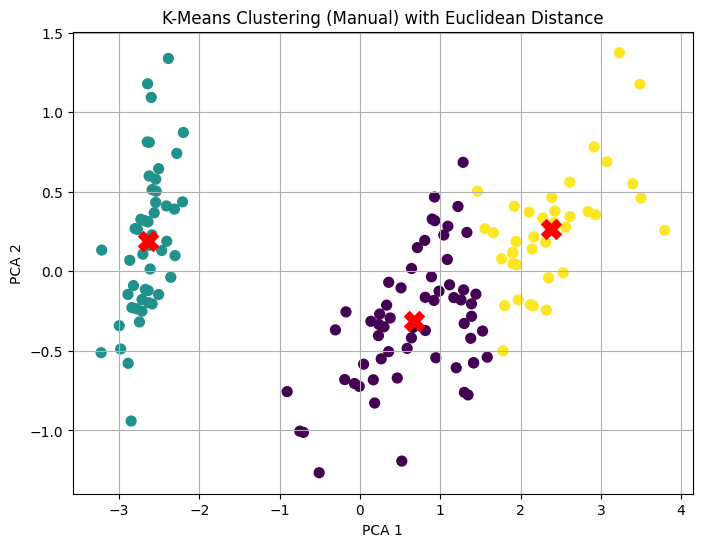

In [9]:
pca = PCA(2)
X_pca = pca.fit_transform(X)
centroids_pca = pca.transform(centroids)

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', s=50)
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], c='red', s=200, marker='X')
plt.title("K-Means Clustering (Manual) with Euclidean Distance")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.grid(True)
plt.show()


In [10]:
from sklearn.metrics import silhouette_score

score = silhouette_score(X, labels)
print(f"Silhouette Score: {score:.2f}")


Silhouette Score: 0.55
